# Testing dataset loading

This notebook contains code that run the pipeline we have created to analyze a set of datasets.

In [24]:
# adding the project root inside the python path
import sys
import os

sys.path.insert(0, os.path.abspath('..'))

In [25]:
# The path where the dataset are stored
DATASET_PATH: str = "../../dataset/first_disease_sel/"
DISEASE_COLNAME: str = 'DISEASE'

In [26]:
from analysis.dataset import load_datasets, compute_ds_col_intersection, clean_datasets, build_dataset, scale_minmax

### Load datasets

In [27]:
# Load dataset
datasets = load_datasets(DATASET_PATH)
# compute intersection
colname_intersection = compute_ds_col_intersection(datasets)
# clean datasets
datasets = clean_datasets(datasets, colname_intersection)

INFO:root:Inspecting directory ../../dataset/first_disease_sel/GS
INFO:root:Setting disease as GS
INFO:root:Inspecting directory ../../dataset/first_disease_sel/NALD
INFO:root:Setting disease as NALD
INFO:root:Inspecting directory ../../dataset/first_disease_sel/A1A
INFO:root:Setting disease as A1A
INFO:root:Inspecting directory ../../dataset/first_disease_sel/MCM
INFO:root:Setting disease as MCM
INFO:root:Inspecting directory ../../dataset/first_disease_sel/DIABETE
INFO:root:Setting disease as DIABETE


## Scaling

In [23]:
scale_minmax(datasets)

## Building unique DS

In [28]:
# finally build the unique dataset
dataset = build_dataset(datasets)

,MAML3,ANKMY1,TBL2,ZNF354A,MN1,KANSL2,AUP1,SGPP1,RPIA,IPP,...,SAMD4B,ZNF91,DCXR,TPP2,PTGER4,TPST2,CAMTA2,PRR14,KDELR1,BCL9
0,3.612524,0.385455,2.992113,1.972166,1.784005,4.647123,6.276963,1.569880,3.334396,2.540734,...,3.192810,3.560036,3.866660,5.314041,3.956139,3.555380,1.449586,1.569880,4.353127,1.684114
1,3.592755,0.291585,2.767411,2.891583,1.732158,4.664139,6.026875,2.007792,3.713049,2.613513,...,2.342211,3.603587,3.506598,4.623782,3.959964,3.038819,2.007792,0.943662,4.472915,1.391121
2,3.594671,1.324629,3.008692,2.969113,1.145363,4.521739,6.087842,-0.970114,3.422203,2.574207,...,2.399120,3.327567,4.683328,5.110259,4.008082,3.784774,1.968486,-0.970114,4.521739,2.399120
3,3.675737,1.001137,3.323066,2.014394,2.510151,4.649426,6.026030,0.108053,2.510151,1.944554,...,2.726962,3.647655,4.311925,5.201565,4.631973,4.171062,1.824260,1.207588,4.558086,0.760129
4,3.783972,1.502079,2.830069,2.340765,2.926577,4.672004,6.105776,1.502079,2.982072,2.982072,...,3.087041,3.620823,3.822488,5.650242,4.148969,3.136794,2.383434,0.424076,5.516152,1.898008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,264.719268,247.695521,1590.869171,297.915575,93.630609,749.896062,2988.518811,119.166230,501.349353,291.106076,...,992.484459,659.670202,530.289724,1918.576303,1401.054390,2553.562072,535.396848,235.778898,2049.659156,249.397896
3,241.189881,300.638091,989.388069,371.975943,105.308258,553.717614,2011.048023,52.654129,401.700048,311.678473,...,1046.288498,690.448498,383.016325,1808.924108,1177.074561,1638.222819,532.486111,338.854798,1791.089645,490.023103
4,344.223423,280.478345,910.138063,405.843666,125.365321,553.165624,1973.264315,41.080162,304.559819,212.483595,...,1553.963355,703.320698,371.138012,1619.124990,932.802980,1340.771482,562.373247,289.685967,2044.092180,423.550632
5,172.769046,376.569425,1277.316778,334.635190,282.636740,714.559353,2087.486186,61.223982,348.054145,622.304038,...,1143.127229,868.877336,520.823191,1707.562023,1053.387967,1407.312905,589.595335,326.248343,2053.938799,291.862271


In [31]:
dataset["MAML3"].max()

2507.4

## Inspecting dataset we have built

In [9]:
dataset['DISEASE']

0          GS
1          GS
2          GS
3          GS
4          GS
       ...   
12    DIABETE
13    DIABETE
14    DIABETE
15    DIABETE
16    DIABETE
Name: DISEASE, Length: 399, dtype: object

DIABETE    176
A1A        128
NALD        38
GS          29
MCM         28
Name: DISEASE, dtype: int64


<AxesSubplot:>

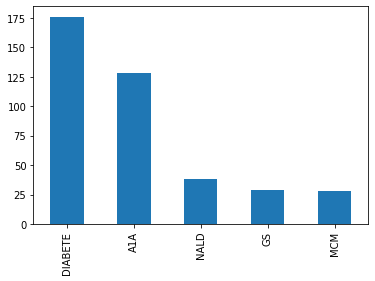

In [10]:
# plotting the number of sample for each disease
disease = dataset['DISEASE'].value_counts()
print(disease)
disease.plot.bar()

In [ ]:
import matplotlib.pyplot as plt
from bioinfokit import analys, visuz
import numpy as np

In [ ]:
visuz.gene_exp.hmap(df=dataset.astype(float), rowclus=False, colclus=False, dim=(10, 10), tickfont=(2, 4), show=True)